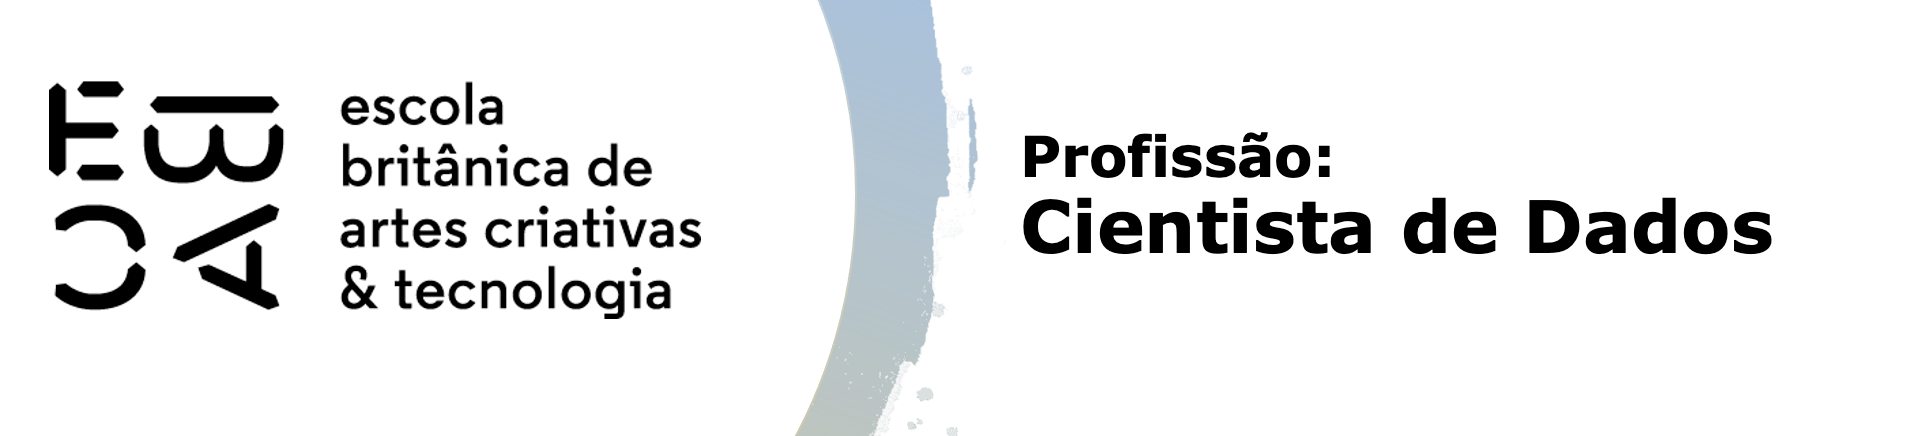

# Tarefa

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, t

In [6]:
pg = sns.load_dataset('penguins')

In [7]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

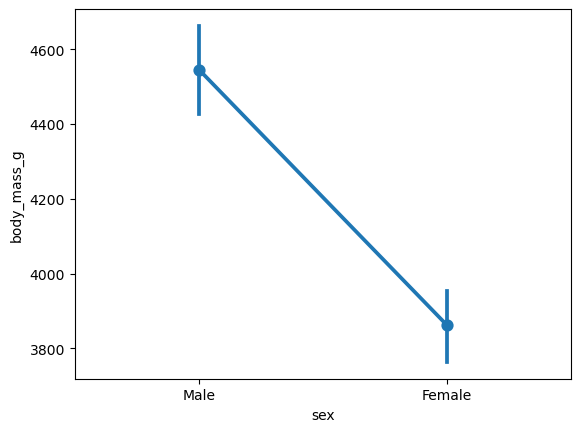

In [8]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [10]:
# Separando os pesos conforme o sexo:
pesos_femeas = pg[pg['sex'] == 'Female']['body_mass_g'].dropna()
pesos_machos = pg[pg['sex'] == 'Male']['body_mass_g'].dropna()

In [13]:
# Fazendo o teste T:
stat, p_value = ttest_ind(pesos_machos, pesos_femeas)
print("p-value:", p_value)

if p_value < 0.05:
    print("Existe diferença significativa entre os pesos de machos e fêmeas.")
else:
    print("Não foi encontrada diferença significativa entre os pesos.")

p-value: 4.897246751596224e-16
Existe diferença significativa entre os pesos de machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

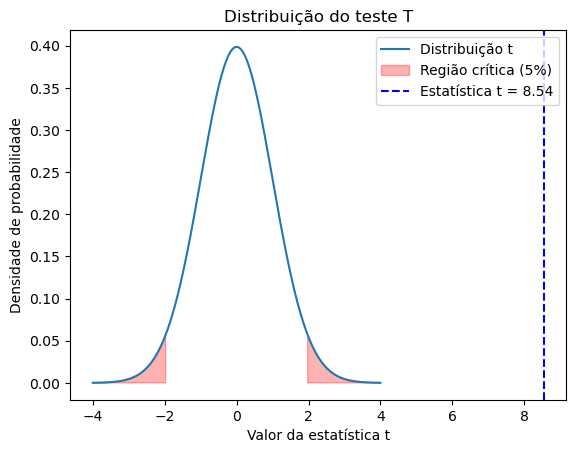

In [18]:
# Graus de liberdade aproximado
df = len(pesos_femeas) + len(pesos_machos) - 2

# Criando valores do eixo x
x = np.linspace(-4, 4, 400)
y = t.pdf(x, df)

plt.plot(x, y, label='Distribuição t')

# Região crítica
alfa = 0.05
t_critico = t.ppf(1 - alfa/2, df)  # Limite superior

plt.fill_between(x, 0, y, where=(x <= -t_critico) | (x >= t_critico), color='red', alpha=0.3, label='Região crítica (5%)')

# Estatística do teste
plt.axvline(stat, color='blue', linestyle='--', label=f'Estatística t = {stat:.2f}')

plt.title('Distribuição do teste T')
plt.xlabel('Valor da estatística t')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [19]:
print(pg['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [21]:
for especie in pg['species'].unique():
    dados_especie = pg[pg['species'] == especie]
    pesos_machos = dados_especie[dados_especie['sex'] == 'Male']['body_mass_g'].dropna()
    pesos_femeas = dados_especie[dados_especie['sex'] == 'Female']['body_mass_g'].dropna()
    
    if len(pesos_machos) > 0 and len(pesos_femeas) > 0:
        stat, p_value = ttest_ind(pesos_machos, pesos_femeas)
        print(f'Espécie: {especie} | p-value: {p_value:.4f}')
    else:
        print(f'Espécie: {especie} | Dados insuficientes para comparar')

Espécie: Adelie | p-value: 0.0000
Espécie: Chinstrap | p-value: 0.0000
Espécie: Gentoo | p-value: 0.0000


Para todas as espécies, o teste T detectou uma diferença significativa de peso entre machos e fêmeas.